## Analiza spletne strani Math Stack Exchange
Poglejmo kako najbolje postaviti vprašanje na MSE (Največja možnost za odgovor in dobro oceno).
Primerjal bom vprašanja iz 3 kategorij.
Kategorijo "highest score" bom uporabil kot primer uspešnih vprašanj, kategorijo "unanswered" kot primer slabo postavljenih vprašanj, in kategorijo "trending" za analizo značilnosti vprašanj ki so na dobri poti do uspeha.

In [1]:
import pandas as pd

In [2]:
vprasanja = pd.read_csv("vprasanja.csv", index_col="id")
oznake = pd.read_csv("oznake_vprasanj.csv")
vprasanja_z_oznakami = pd.merge(vprasanja, oznake, left_on="id", right_on="id")
vprasanja_z_oznakami_highest = vprasanja_z_oznakami[vprasanja_z_oznakami["Kategorija"] == "highest-score"]
vprasanja_z_oznakami_unansw = vprasanja_z_oznakami[vprasanja_z_oznakami["Kategorija"] == "unanswered"]
vprasanja_z_oznakami_trending = vprasanja_z_oznakami[vprasanja_z_oznakami["Kategorija"] == "trending"]

Najprej si poglejmo najbolj popularne oznake.

<Axes: xlabel='Število vprašanj', ylabel='oznaka'>

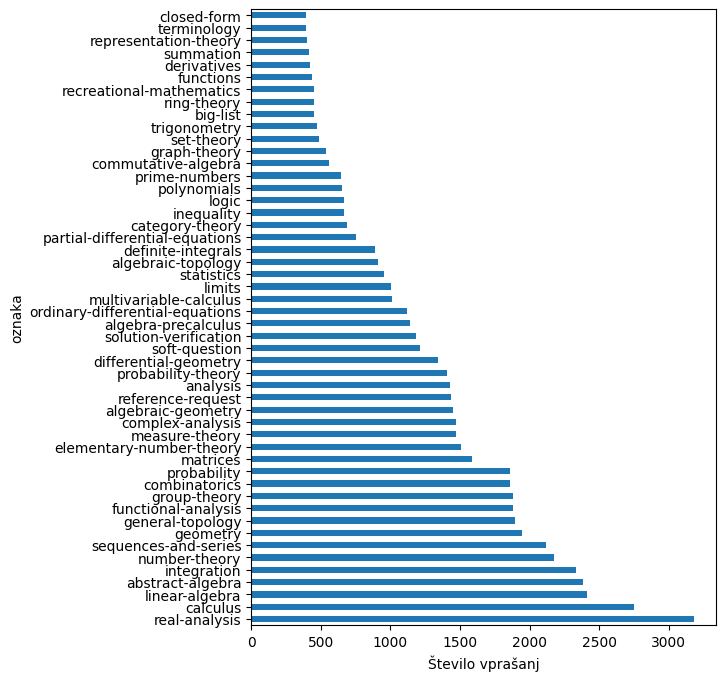

In [3]:
top50_oznake = vprasanja_z_oznakami["oznaka"].value_counts().head(50).index
vprasanja_z_oznakami["oznaka"].value_counts().head(50).plot.barh(figsize=(6,8),xlabel="Število vprašanj")

Vidimo da so na forumu najbolj popularne veje matematike tiste, s katerimi se srečamo na začetku našega matematičnega izobraževanja (real analysis, calculus, linear algebra,...), medtem ko so naprednejše veje (representation theory, category theory, algebraic topology,...) manj popularne. To namiguje na to, da je ta forum namenjen tistim, ki so šele na začetku njihovega matematičnega izobraževanja.

Poglejmo si katere oznake imajo najmanj sprejetih odgovorov

<Axes: xlabel='% neodgovorjenih vprašanj', ylabel='oznaka'>

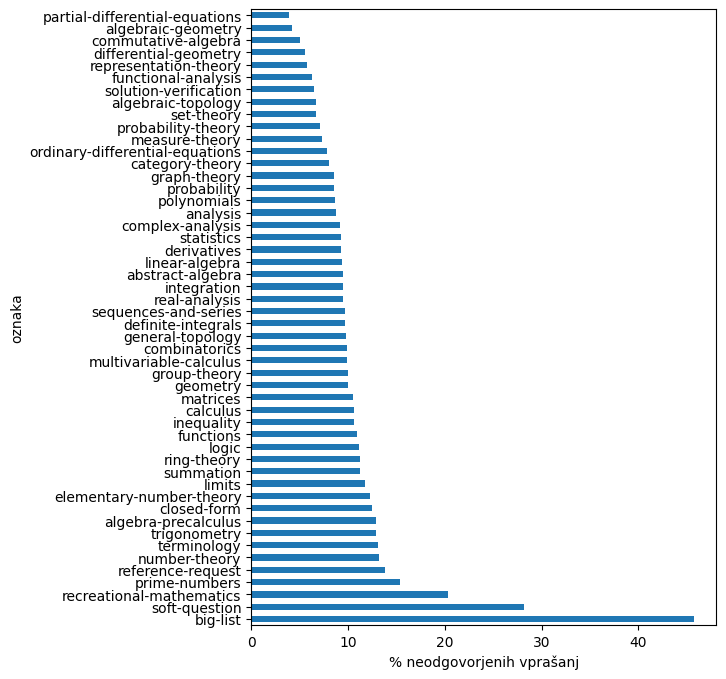

In [4]:
brez_sprej_odg = vprasanja_z_oznakami[(vprasanja_z_oznakami["Ima sprejet odgovor"] == False) & (vprasanja_z_oznakami_highest["Ogledi"] >= 300) & (vprasanja_z_oznakami_highest["oznaka"].isin(top50_oznake))]#vsi brez sprejetega odgovora
st_brez_odg = brez_sprej_odg.groupby("oznaka").size() #za vsako oznako dobim število vprašanj brez sprejetega odgovora
st_vseh = vprasanja_z_oznakami[vprasanja_z_oznakami["oznaka"].isin(top50_oznake)].groupby("oznaka").size()#št vseh vprašanj za vsako oznako
tezavnost = (st_brez_odg/ st_vseh) * 100
tezavnost.sort_values(ascending=False).plot.barh(figsize=(6,8),xlabel="% neodgovorjenih vprašanj")

Vidimo, da imajo skoraj vse popularne oznake približno enak delež neodgovorjenih vprašanj. Izstopajo le big list, soft-question, ter recreational mathematics, ki so namenjene bolj splošnim ne-specializiranim vprašanjam. Torej izbira teme ne vpliva preveč na to, ali bomo dobili odgovor (dokler se držimo 50 najbolj popularnih oznak).

# Kako postaviti dobro vprašanje?

## Optimalna dolžina naslova:

Najprej si poglejmo kako pogoste so določene dolžine naslovov.

<Axes: xlabel='Dolzina naslova', ylabel='Število vprašanj'>

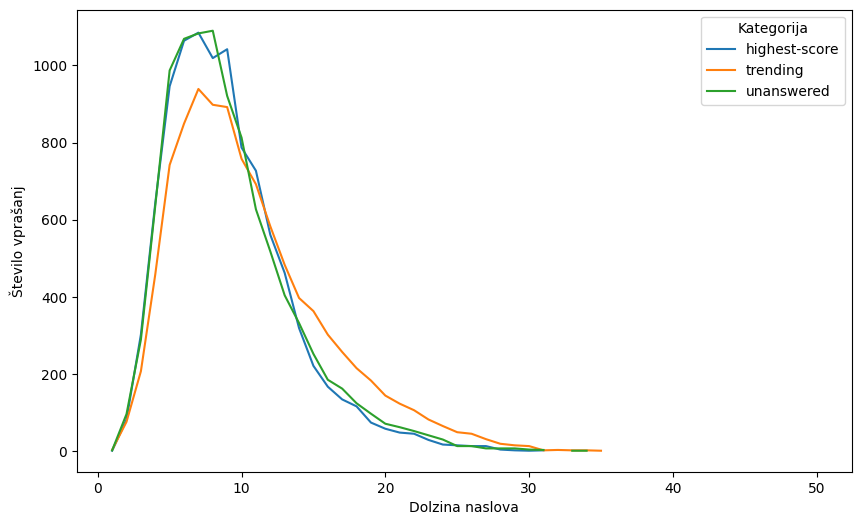

In [5]:
vprasanja["Dolzina naslova"] = vprasanja["Naslov"].str.split().str.len()

pivoted = vprasanja.pivot_table(index="Dolzina naslova", columns="Kategorija", aggfunc="size")
pivoted[["highest-score", "trending", "unanswered"]].plot(ylabel="Število vprašanj", figsize=(10,6))

Vidimo, da je v vseh treh kategorijah porazdelitev približno enaka. Največ vprašanj je dolžine 7-9 besed.

Poglejmo si kako je dolžina naslova povezana s številom ogledov.

<Axes: xlabel='Dolzina naslova', ylabel='Povprečno število ogledov'>

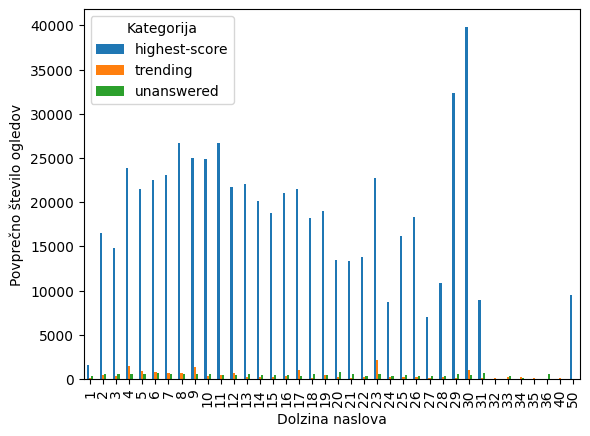

In [6]:
mean_views = vprasanja.pivot_table(
    index="Dolzina naslova",
    columns="Kategorija",
    values="Ogledi",
    aggfunc="mean"
)
mean_views[["highest-score", "trending", "unanswered"]].plot.bar(ylabel="Povprečno število ogledov")

V kategoriji "highest score" največ pozornosti pritegnejo vprašanja sestavljena iz 4-13 besed. Število ogledov pri daljših naslovih postopoma pada. Izjema so vprašanja z naslovom dolžine 29 in 30 besed, ki so iz nekega razloga najbolj popularna.

Poglejmo si kategoriji trending in unanswered od bližje.

<Axes: xlabel='Dolzina naslova', ylabel='Povprečno število ogledov'>

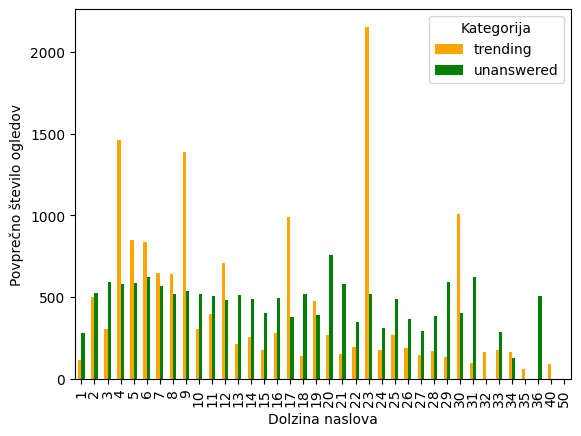

In [7]:
mean_views[["trending", "unanswered"]].plot.bar(ylabel="Povprečno število ogledov", color=["orange", "green"])

Največ ogledov dobijo torej vprašanja dolžine 9, 4 in 23. Zgleda, da so vprašanja iz kategorije "unanswered" v splošnem slabše ogledana (ne glede na dolžino naslova).

Poglejmo kako je dolžina naslova povezana s številom odgovorov.

<Axes: xlabel='Dolzina naslova', ylabel='Povprečno število odgovorov'>

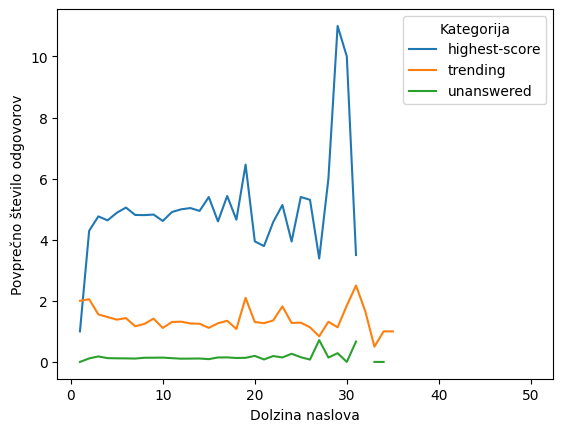

In [8]:
mean_answers = vprasanja.pivot_table(
    index="Dolzina naslova",
    columns="Kategorija",
    values="Število odgovorov",
    aggfunc="mean"
)
mean_answers[["highest-score", "trending", "unanswered"]].plot(ylabel="Povprečno število odgovorov")

Vidimo, da dolžina naslova ne vpliva na število odgovorov za vprašanja kategorije trending. Vprašanja iz kategorije highest score z naslovom dolžine 29-30 imajo največ odgovorov (tako kot ogledov). Kot pričakovano, kategorija unanswered načeloma nima odgovorov.

Poglejmo kako je dolžina naslova povezana s verjetnostjo za sprejet odgovor.

<Axes: xlabel='Dolzina naslova', ylabel='% sprejetih odgovorov'>

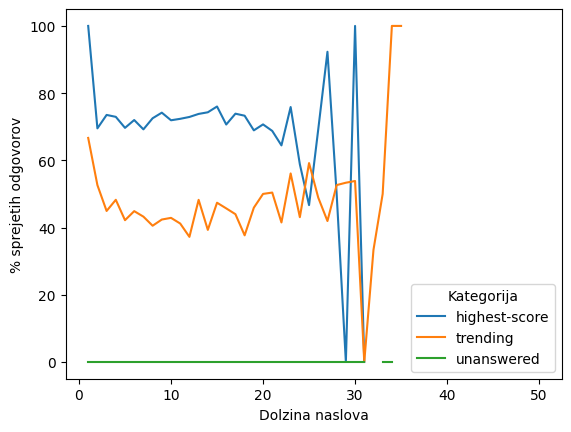

In [9]:
mean_accepted = vprasanja.pivot_table(
    index="Dolzina naslova",
    columns="Kategorija",
    values="Ima sprejet odgovor",
    aggfunc="mean"
)
mean_accepted *= 100
mean_accepted[["highest-score", "trending", "unanswered"]].plot(ylabel="% sprejetih odgovorov")

Iz grafa je razvidno da imajo krajša vprašanja večjo možnost za sprejet odgovor. Mogoče so manj kompleksna. Izjema so spet vprašanja dolžine 30, vendar vemo že, da imajo tudi več ogledov in več odgovorov, kar poveča možnost za sprejet odgovor.

Za konec si še poglejmo povezavo med dolžino naslova in številom glasov.

<Axes: xlabel='Dolzina naslova', ylabel='Povprečno število glasov'>

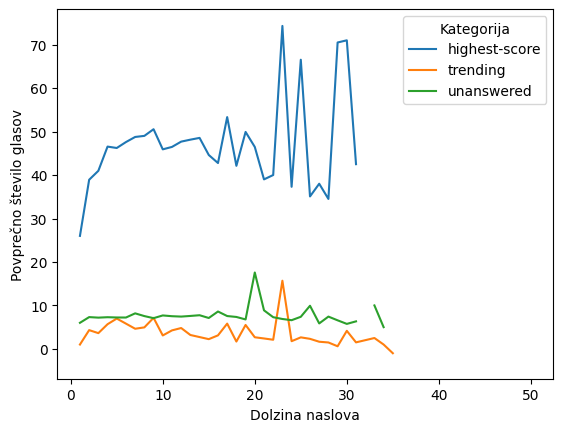

In [10]:
mean_votes = vprasanja.pivot_table(
    index="Dolzina naslova",
    columns="Kategorija",
    values="Glasovi",
    aggfunc="mean"
)
mean_votes[["highest-score", "trending", "unanswered"]].plot(ylabel="Povprečno število glasov")

V kategoriji highest score je prvi maksimum dosežen pri dolžini 7-9, kasneje pa se število glasov krepko poveča za vprašanja dolžine 20+. Podobno se obnaša tudi graf za kategorijo trending.
Graf za kategorijo unanswered je relativno konstanten, torej neodvisen od dolžine naslova.

## Sklep
Očitno je najbolje postavljati krajša jedrnata vprašanja (dolžine 7-9 besed), ali pa daljša, verjetno zelo podrobna in tehnična vprašanja dolžine 25+.
Grafi za kategorijo unanswered nam povejo, da optimalna dolžina naslova sama po sebi ni dovolj za dobro postavljeno vprašanje.

# Optimalno število oznak

Najprej si poglejmo najbolj pogosto število oznak za določeno vprašanje.

<Axes: xlabel='število oznak', ylabel='Število vprašanj'>

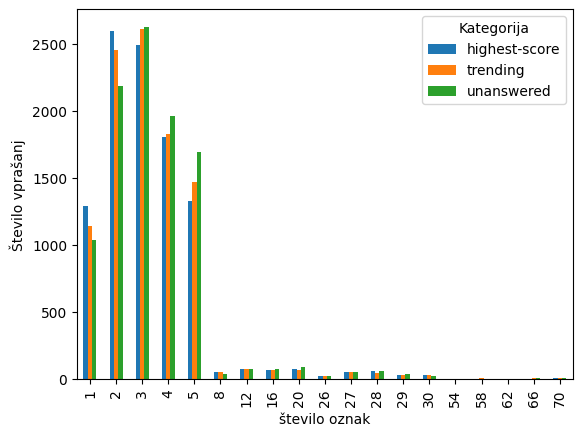

In [11]:
št_oznak = vprasanja_z_oznakami.groupby("id")["oznaka"].size() #st oznak za vsak id
vprasanja["število oznak"] = št_oznak.reindex(vprasanja.index) #id ni key ker sem ga uporabil kot index za tabelo

št_vpr_tag = vprasanja.pivot_table(
    index="število oznak",
    columns="Kategorija",
    aggfunc="size"
)
št_vpr_tag.plot.bar(ylabel="Število vprašanj")

Vidimo, da je porazdelitev skoraj enaka za vse tri kategorije. Največ vprašanj ima 2-4 oznake.

Poglejmo kako je število oznak povezano s številom ogledov.

<Axes: xlabel='število oznak', ylabel='Povprečno število ogledov'>

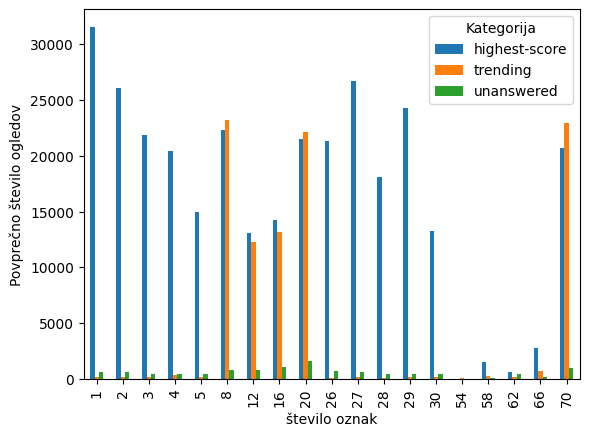

In [12]:
ogledi_tag = vprasanja.pivot_table(
    index="število oznak",
    values = "Ogledi",
    columns="Kategorija",
    aggfunc="mean"
)
ogledi_tag.plot.bar(ylabel="Povprečno število ogledov")

V kategoriji highest score so daleč najbolj ogledana vprašanja z 1 oznako. V kategoriji trending so najbolj ogledana vprašanja z 8 ali 20 oznakami. Že od prej vemo, da so vprašanja kategorije unanswered slabše ogledana. Očitno je to neodvisno tudi od števila oznak.

<Axes: xlabel='število oznak', ylabel='Povprečno število odgovorov'>

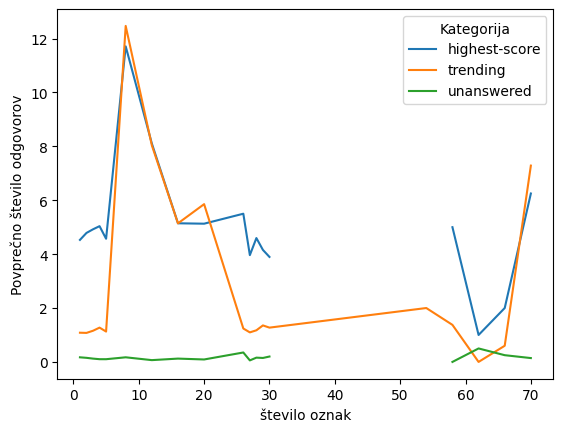

In [13]:
odgovori_tag = vprasanja.pivot_table(
    index="število oznak",
    values = "Število odgovorov",
    columns="Kategorija",
    aggfunc="mean"
)
odgovori_tag.plot(ylabel="Povprečno število odgovorov")

Vprašanja z 8 oznakami dobijo največ odgovorov v obeh kategorijah (trending in highest score). Večje kot je število oznak, manj je odgovorov (to je verjetno posledica slabše ogledanosti teh vprašanj).

<Axes: xlabel='število oznak', ylabel='Povprečno število glasov'>

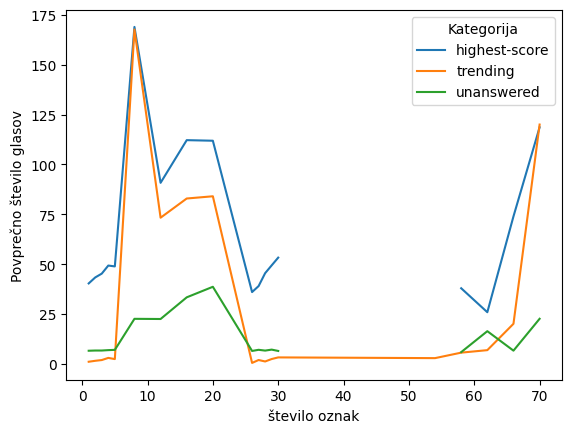

In [14]:
glasovi_tag = vprasanja.pivot_table(
    index="število oznak",
    values = "Glasovi",
    columns="Kategorija",
    aggfunc="mean"
)
glasovi_tag.plot(ylabel="Povprečno število glasov")

Očitno so vprašanja z 8 oznakami tudi najbolje ocenjena. Več kot je oznak, slabša je ocena (z izjemo 65+ oznak, kar predstavlja zelo majhen delež vprašanj).

<Axes: xlabel='število oznak', ylabel='$ sprejetih odgovorov'>

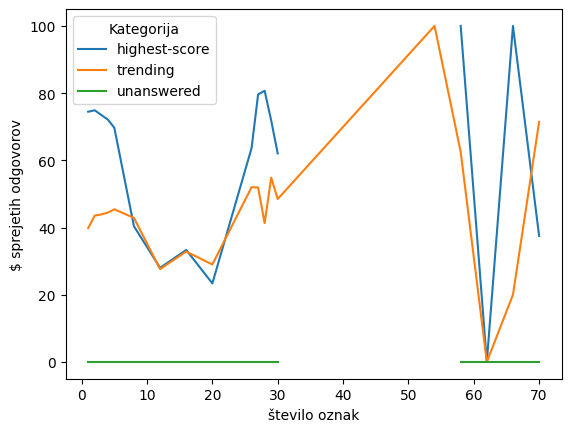

In [15]:
sprejeti_tag = vprasanja.pivot_table(
    index="število oznak",
    values = "Ima sprejet odgovor",
    columns="Kategorija",
    aggfunc="mean"
)

sprejeti_tag *= 100
sprejeti_tag.plot(ylabel="$ sprejetih odgovorov")

## Sklep

Najbolj optimalno je označiti vprašanja z 8 oznakami. Iz grafov je razvidna tudi izjema za vprašanja s 50+ oznakami, ampak je število takih vprašanj zelo majhno, kar je mogoče razlog za odstopanje. Analiza vprašanj iz kategorije unanswered nam pove, da optimalno število oznak samo po sebi ni dovolj za dobro postavljeno vprašanje.

Za konec si še poglejmo še kako je v splošnem povezan ugled avtorja z uspehom vprašanja.

/var/folders/lj/fhnk8b7x1kl5hhh1nvzbczk00000gn/T/ipykernel_30687/3385951145.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vprasanja_z_reputacijo.groupby(pd.cut(vprasanja_z_reputacijo["reputation"], bins=bins, labels=labels))["Glasovi"].mean().plot(figsize=(10,8), ylabel="Gasovi-povprečje")


<Axes: xlabel='reputation', ylabel='Gasovi-povprečje'>

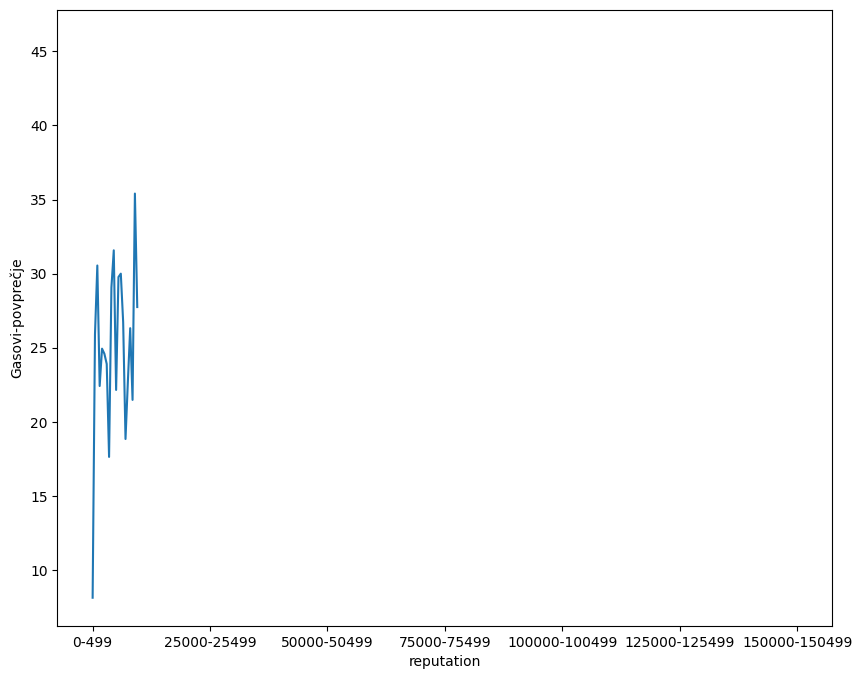

In [16]:
avtorji = pd.read_csv("avtorji.csv")
vprasanja_z_reputacijo = pd.merge(vprasanja, avtorji, left_on="Avtor", right_on="author")
max_rep = vprasanja_z_reputacijo["reputation"].max()
bins  = range(0, int(max_rep) + 500, 500)
labels = [f"{i}-{i+499}" for i in bins[:-1]]
vprasanja_z_reputacijo.groupby(pd.cut(vprasanja_z_reputacijo["reputation"], bins=bins, labels=labels))["Glasovi"].mean().plot(figsize=(10,8), ylabel="Gasovi-povprečje")

Vidimo, da načeloma avtorji z boljšim ugledom postavljajo boljša vprašanja

# Zaključek

Iz analize vidimo, da je forum namenjen predvsem dodiplomskim študentom matematike, torej če hočemo postaviti uspešno vprašanje se je najbolje držati tem kot so analiza, algebra, calculus itd.

Največ možnosti za dobro vidnost in oceno imajo krajši naslovi, dolžine približno 7-9 besed, ali pa zelo dolgi, podrobni in tehnični naslovi dolžine 25-30 besed.

Vprašanje je najbolj optimalno označiti z 8 oznakami.

Primerjava z vprašanji iz kategorije unanswered nam pokaže, da so to dejavniki, ki te spravijo v kategorijo trending, toda za visoke ocene potrebujemo tudi dobro vsebino.